In [1]:
import os
import yaml

import numpy as np
from corner import corner

from mejiro.utils import util

# read configuration file
with open('hwo.yaml', 'r') as f:  # roman_hlwas_medium
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

total = config['survey']['total_population']

In [3]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '01')

detectable_csv = os.path.join(data_dir, 'detectable_pop.csv')
detectable_df = util.combine_all_csvs(data_dir, 'detectable', detectable_csv)

if total:
    total_csv = os.path.join(data_dir, 'total_pop.csv')
    total_df = util.combine_all_csvs(data_dir, 'total', total_csv)

Wrote combined CSV to /data/bwedig/mejiro/hwo/01/detectable_pop.csv


In [4]:
survey_area = config['survey']['area']
runs = config['survey']['runs']
total_area = survey_area * runs
print(f'{runs} run(s) of {survey_area} sq. deg. each gives {total_area:.2f} sq. deg. total')

print(f'{len(detectable_df)} detectable strong lenses')

det_per_sq_deg = len(detectable_df) / total_area
print(f'Detectable strong lenses per sq. deg.: {det_per_sq_deg:.2f}')

det_per_exposure = det_per_sq_deg * 0.281
print(f'Detectable strong lenses per exposure: {det_per_exposure:.2f}')

snr_threshold = 200
high_snr_df = detectable_df[detectable_df['snr'] > snr_threshold]
high_snr_det_per_sq_deg = len(high_snr_df) / total_area
# high_snr_det_per_exposure = high_snr_det_per_sq_deg * 0.281

print(f'{len(high_snr_df)} characterizable strong lenses (SNR > {snr_threshold})')
print(f'{high_snr_det_per_sq_deg:.2f} characterizable per sq. deg.')
# print(f'Characterizable strong lenses per exposure: {high_snr_det_per_exposure:.2f}')

2500 run(s) of 0.1 sq. deg. each gives 250.00 sq. deg. total
9886 detectable strong lenses
Detectable strong lenses per sq. deg.: 39.54
Detectable strong lenses per exposure: 11.11
9886 characterizable strong lenses (SNR > 200)
39.54 characterizable per sq. deg.


In [5]:
band = 'J'  # F129

labels = [
    r"$\sigma_v$",
    r"$\log(M_{*})$",
    r"$\theta_E$",
    r"$z_{\rm l}$",
    r"$z_{\rm s}$",
    r"$m_{\rm source}$",
    r"$m_{\rm lens}$",
    "SNR"
]

detectable_sample, total_sample = [], []

for i, row in detectable_df.iterrows():
    detectable_sample.append([
        row['vel_disp'],
        np.log10(row['m_star']),
        row['theta_e'],
        row['z_lens'],
        row['z_source'],
        row[f'mag_{band}_source'],
        row[f'mag_{band}_lens'],
        row['snr']
    ])

if total:
    for i, row in total_df.iterrows():
        total_sample.append([
            row['vel_disp'],
            np.log10(row['m_star']),
            row['theta_e'],
            row['z_lens'],
            row['z_source'],
            row[f'mag_{band}_source'],
            row[f'mag_{band}_lens'],
            row['snr']
        ])

In [6]:
def weights(data):
    return 1 / len(data) * np.ones(len(data))

In [7]:
if total:
    total_corner = corner(np.array(total_sample), labels=labels, show_titles=True, weights=weights(total_sample))

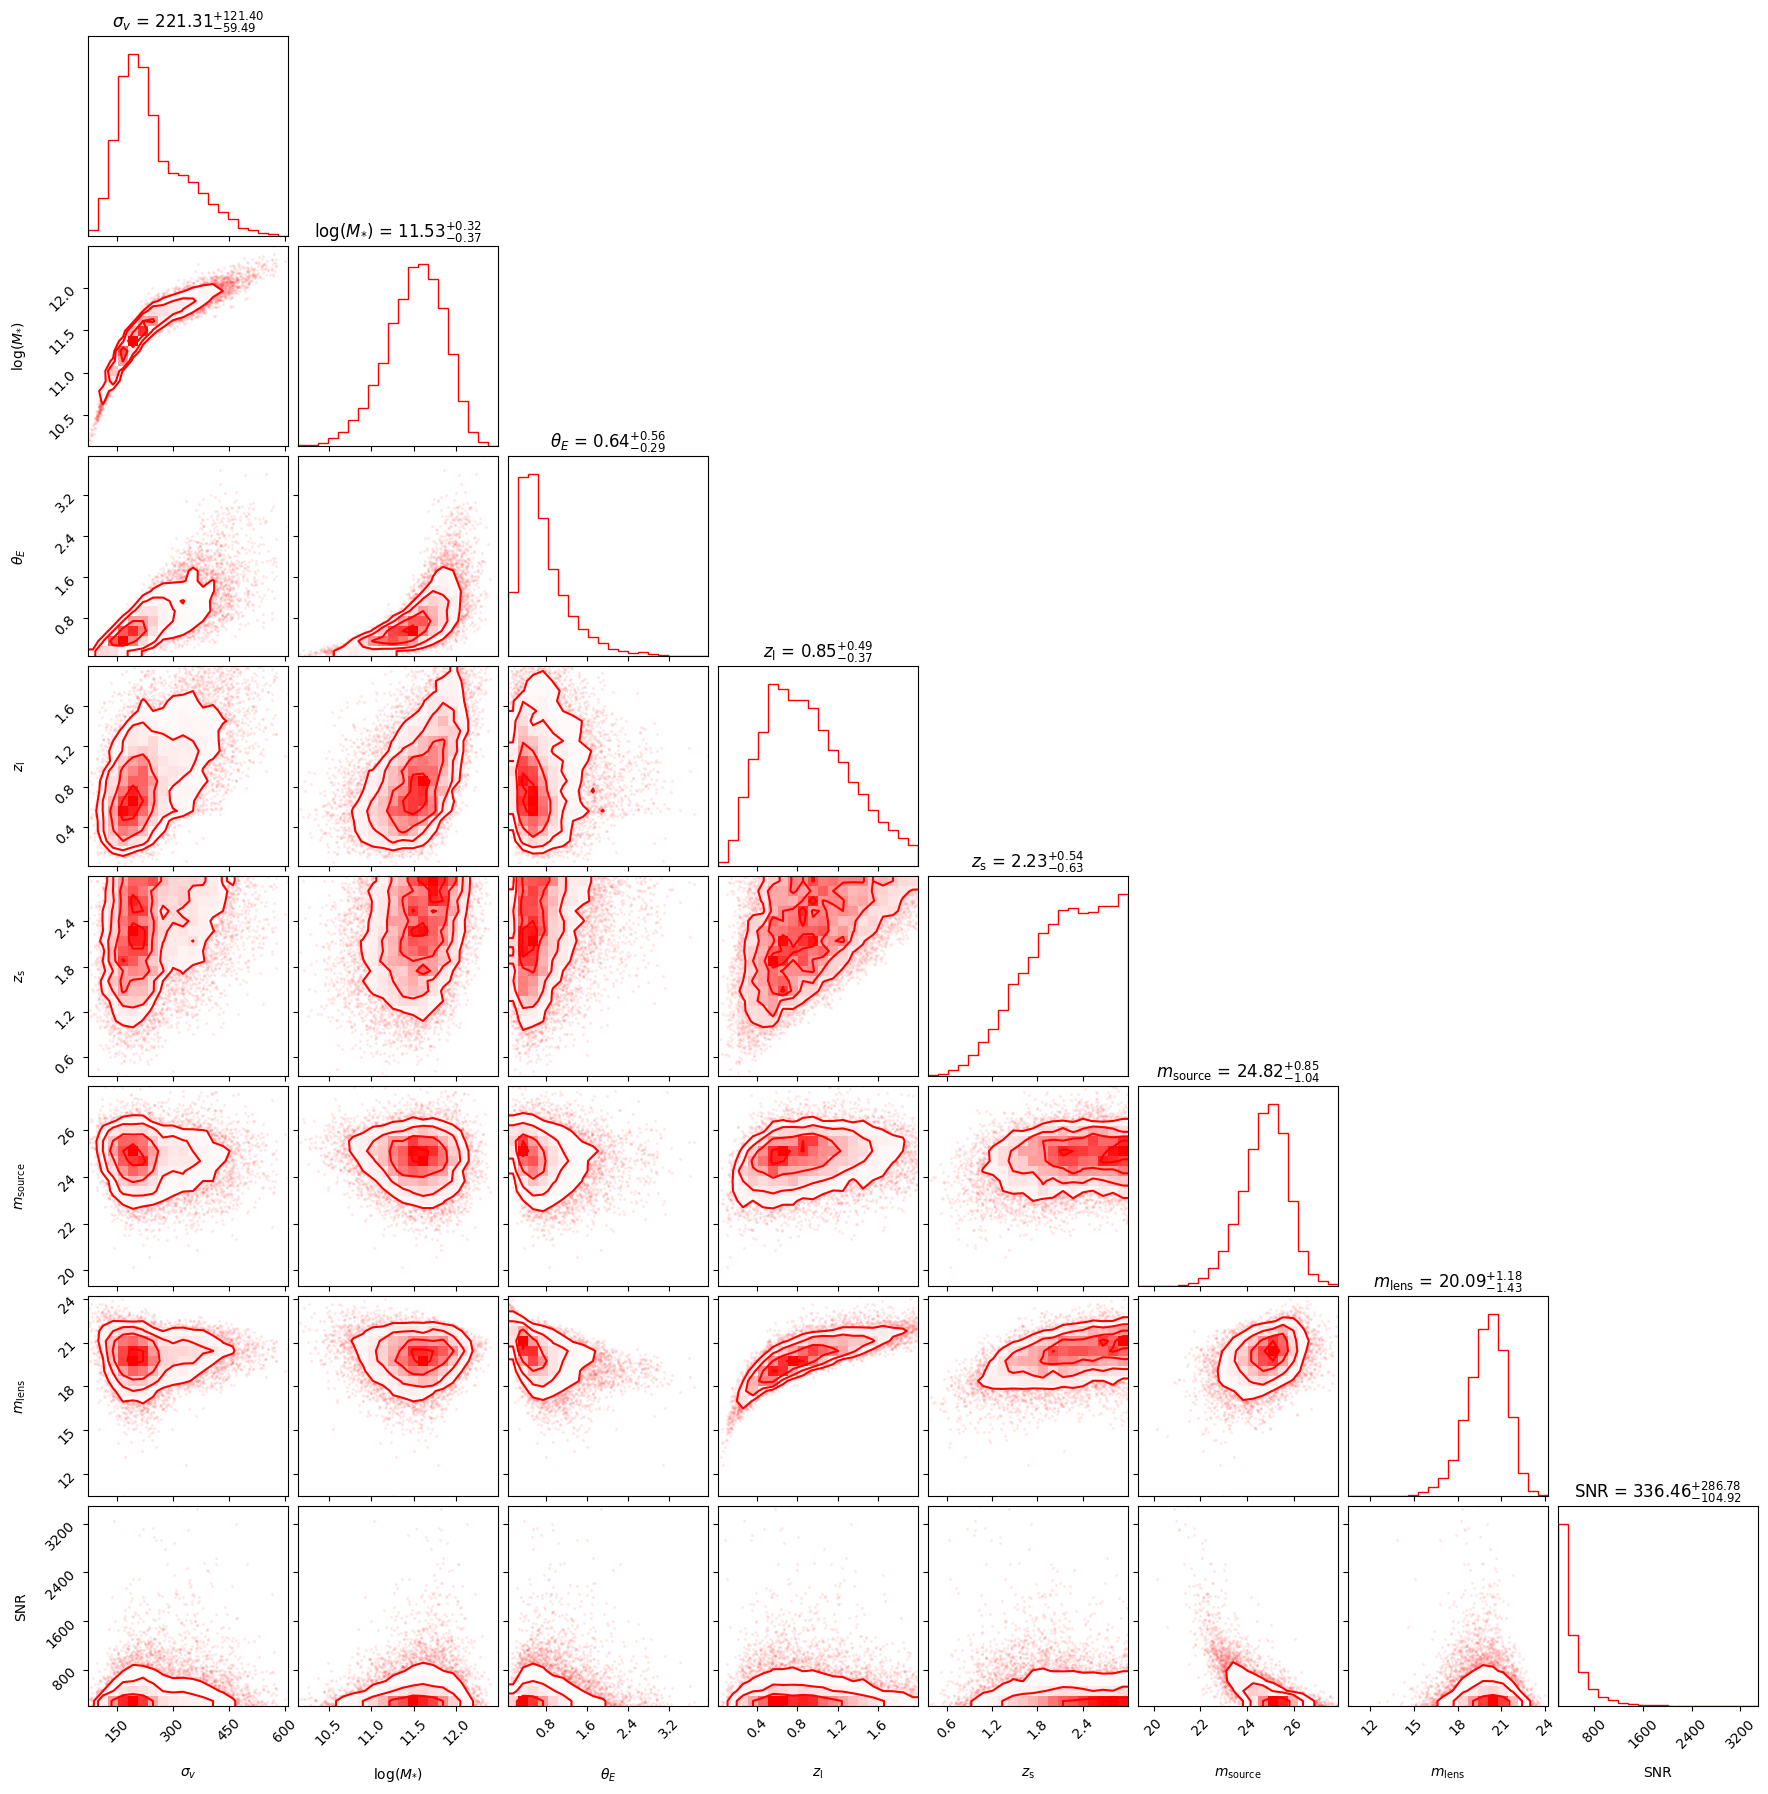

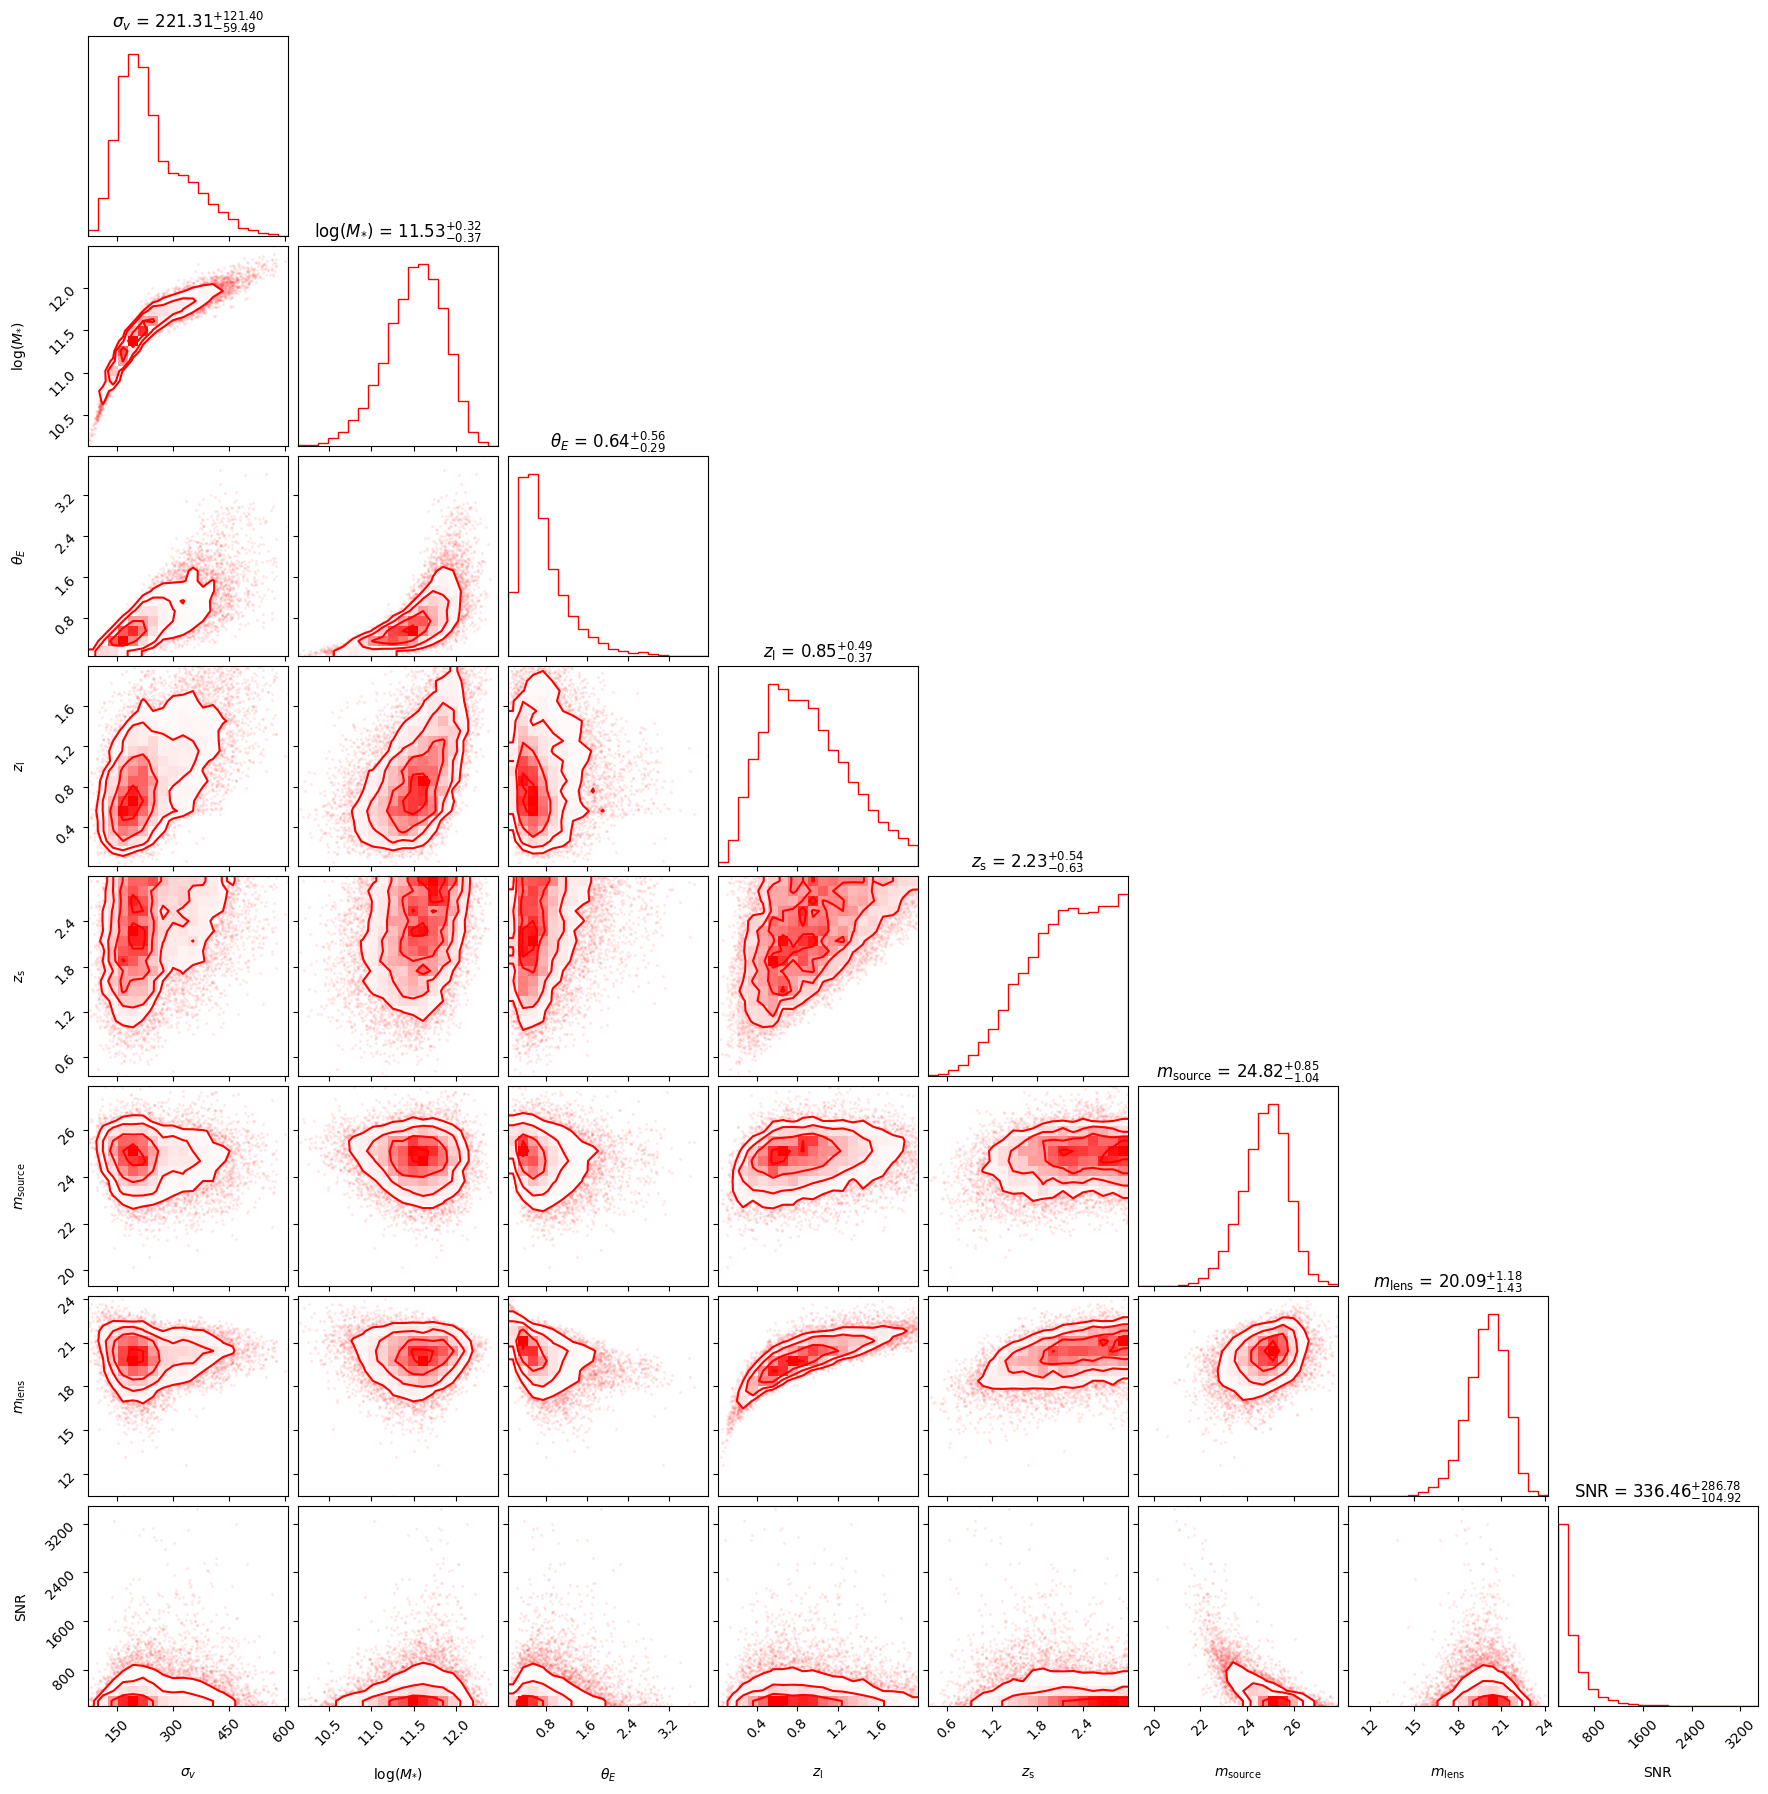

In [10]:
# corner(np.array(detectable_sample), color='red', labels=labels, show_titles=True, fig=total_corner, density=True, weights=weights(detectable_sample))

corner(np.array(detectable_sample), color='red', labels=labels, show_titles=True, density=True, weights=weights(detectable_sample))